<a href="https://colab.research.google.com/github/RasyaAkbar/learning-py-torch/blob/main/06.%20Training%20data%20using%20script%20and%20cell%20mode%20%2B%20Exercise%20(using%20argparse%20for%20script%20params).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. Going Modular Part 1 (Cell Mode)

## 1. Get Data

Start by downloading the pizza_steak_sushi dataset

In [2]:
import os
import zipfile

from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If image folder doesn't exist, download and prepare it
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Didn't find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)

# Remove zip file (we already extract it)
os.remove(data_path / "pizza_steak_sushi.zip")

Didn't find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [3]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2. Create Datasets and DataLoaders

In [4]:
from torchvision import datasets, transforms

# Create simple transform
data_transform = transforms.Compose([
    transforms.Resize((64, 64)), # 64 x 64 image
    transforms.ToTensor()
])

# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir, # target folder
                                  transform=data_transform, # transform data
                                  target_transform=None) # transform label (None since we use dir name as label)

# Use ImageFolder to create dataset(s)
test_data = datasets.ImageFolder(root=test_dir, # target folder
                                  transform=data_transform, # transform data
                                  target_transform=None) # transform label (None since we use dir name as label)


print(f"Train data: \n{train_data} \nTest data: \n{test_data}")

Train data: 
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           ) 
Test data: 
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [5]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [6]:
# Class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [7]:
len(train_data), len(test_data)

(225, 75)

In [8]:
# Turn train and test datasets into dataloader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch
                              num_workers=os.cpu_count(), # how many subprocesses to use for data loading?
                              shuffle=True # Shuffle data for training
                              )
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=1, # how many samples per batch
                              num_workers=os.cpu_count(), # how many subprocesses to use for data loading?
                              shuffle=False # Not Shuffle data for test
                              )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f6d379cb3a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6d379c8460>)

In [9]:
# Checkout for single image
img, label = next(iter(train_dataloader))

img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 2.1 Create Datasets and DataLoaders (script mode)

Create a `.py` file for creating DataLoaders

we can save a code cell's contents to a file using Jupyter magic `%%writefile filename` - https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile



In [10]:
# Create a directory going_modular scripts
import os
os.makedirs("going_modular")

In [11]:
%%writefile going_modular/data_setup.py
"""
Contains functionality for creating PyTorch DataLoader's for image
classification data.
"""

import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int = NUM_WORKERS
):
  """Creates training and testing DataLoaders.

  Takes in a training directory and testing directroy path and turns them into
  PyTorch Datasets and then into PyTorch DataLoaders.

  Args:
    train_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage:
      train_dataloader, test_dataloader, class_names = create_dataloaders(train_dir=path/to/train_dir,
        test_dir=path/to/test_dir,
        transform=some_transform,
        batch_size=32,
        num_workers=4)
  """

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(root=train_dir, # target folder
                                    transform=transform, # transform data
                                    target_transform=None) # transform label (None since we use dir name as label)

  # Use ImageFolder to create dataset(s)
  test_data = datasets.ImageFolder(root=test_dir, # target folder
                                    transform=transform, # transform data
                                    target_transform=None) # transform label (None since we use dir name as label)

  # Get class names
  class_names = train_data.classes

  # Turn images into DataLoaders
  train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch_size, # how many samples per batch
                              num_workers=num_workers, # how many subprocesses to use for data loading?
                              shuffle=True, # Shuffle data for training
                              pin_memory=True # If True, the data loader will copy Tensors into device/CUDA pinned memory before returning them
                              )
  test_dataloader = DataLoader(dataset=test_data,
                                batch_size=batch_size, # how many samples per batch
                                num_workers=num_workers, # how many subprocesses to use for data loading?
                                shuffle=False, # Not Shuffle data for test
                                pin_memory=True # If True, the data loader will copy Tensors into device/CUDA pinned memory before returning them
                                )

  return train_dataloader, test_dataloader, class_names


Writing going_modular/data_setup.py


In [12]:
from going_modular import data_setup

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir= train_dir,
                                                                              test_dir= test_dir,
                                                                              transform=data_transform,
                                                                              batch_size= 32)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f6d36848430>,
 ['pizza', 'steak', 'sushi'])

## 3. Making a model (TinyVGG)

same model as notebook 4 but added a docstring using this guide: https://google.github.io/styleguide/pyguide.html#384-classes

In [13]:
import torch

from torch import nn


class TinyVGG(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website  https://poloclub.github.io/cnn-explainer/

  Args:
    input_shape: An integer indicating number of input channels.
    hidden_units: An integer indicating number of hidden units between layers.
    output_shape: An integer indicating number of output units.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2
                     ), # stride by default is the same as kernel size
        #nn.Dropout(p=0.5)#   Dropout with a 70% drop rate
    )

    self.conv_block_2 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2
                     ), # stride by default is the same as kernel size
        nn.Dropout(p=0.5) #  Dropout with a 50% drop rate
    )
    self.conv_block_3 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=0 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=0 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2
                     ), # stride by default is the same as kernel size
        nn.Dropout(p=0.5)  # Dropout with a 70% drop rate
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*256, out_features=output_shape) # 7*7 = 49 which is the shape when the image compressed is flatten
    )
  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.classifier(self.conv_block_2(self.conv_block_1(x))) #benefited from operator fusion which behind the scene speeds up how GPU perform computation cuz its 1 step
    # https://horace.io/brrr_intro.html

In [14]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate an instance of the model
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # Number of color channels
                  hidden_units=10,
                  output_shape=len(train_data.classes)
                  ).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.5, inplace=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.5, inplace=False)
  )
  (classifier): Sequential(
    (0): Flatten(s

Test model to findout hidden units multiplier

In [15]:
model_0(torch.rand(32, 3, 64, 64))

tensor([[ 0.1059,  0.0129, -0.0421],
        [ 0.1535,  0.0974, -0.0370],
        [ 0.0771,  0.0868, -0.0420],
        [ 0.0931,  0.0689, -0.0556],
        [ 0.1371,  0.0842, -0.0777],
        [ 0.1921,  0.0949, -0.0642],
        [ 0.1087,  0.0879, -0.0184],
        [ 0.0616,  0.0558,  0.0500],
        [ 0.1418,  0.0835, -0.0375],
        [ 0.0674,  0.0551,  0.0418],
        [ 0.0371,  0.0586, -0.0039],
        [ 0.1247, -0.0251, -0.0630],
        [ 0.1439,  0.0608, -0.0080],
        [ 0.0777, -0.0011, -0.0322],
        [ 0.0924,  0.0426, -0.0968],
        [ 0.1371,  0.0066,  0.0206],
        [ 0.1536,  0.0305, -0.0034],
        [ 0.0306,  0.0519, -0.0604],
        [ 0.1213, -0.0399, -0.0572],
        [ 0.0982,  0.0312, -0.0471],
        [ 0.1145,  0.0631, -0.0237],
        [ 0.0958, -0.0088, -0.0083],
        [ 0.1022,  0.0277, -0.0432],
        [ 0.0733,  0.0229, -0.0520],
        [ 0.0052,  0.0044,  0.0320],
        [ 0.0649, -0.0048, -0.0271],
        [ 0.1781,  0.0445,  0.0084],
 

## 3.1 Making a model (TinyVGG) with a script (`model_builder.py`)

Lets turn our model building code into Python script so we can import

In [16]:
%%writefile going_modular/model_builder.py
"""
Contains PyTorch model code to instantiate a TinyVGG model from CNN explainer website
"""
import torch

from torch import nn

class TinyVGG(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website  https://poloclub.github.io/cnn-explainer/

  Args:
    input_shape: An integer indicating number of input channels.
    hidden_units: An integer indicating number of hidden units between layers.
    output_shape: An integer indicating number of output units.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2
                     ), # stride by default is the same as kernel size
        #nn.Dropout(p=0.5)#   Dropout with a 70% drop rate
    )

    self.conv_block_2 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2
                     ), # stride by default is the same as kernel size
        nn.Dropout(p=0.5) #  Dropout with a 50% drop rate
    )
    self.conv_block_3 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=0 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=0 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2
                     ), # stride by default is the same as kernel size
        nn.Dropout(p=0.5)  # Dropout with a 70% drop rate
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*256, out_features=output_shape) # 7*7 = 49 which is the shape when the image compressed is flatten
    )
  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.classifier(self.conv_block_2(self.conv_block_1(x))) #benefited from operator fusion which behind the scene speeds up how GPU perform computation cuz its 1 step
    # https://horace.io/brrr_intro.html

Writing going_modular/model_builder.py


In [17]:
from going_modular import model_builder

In [18]:
import torch

from going_modular import model_builder

device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate a model from the model_builder.py script
torch.manual_seed(42)
model_1 = model_builder.TinyVGG(input_shape=3,
                                hidden_units=10,
                                output_shape=len(class_names)
                                ).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.5, inplace=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.5, inplace=False)
  )
  (classifier): Sequential(
    (0): Flatten(s

In [19]:
model_1(torch.rand(32, 3, 64, 64)).shape

torch.Size([32, 3])

## 4. Creating `train_step()` and `test_step()` functions and `train()` to combine them

In [20]:
from typing import Dict, List, Tuple

In [21]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device
               ):
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  ### Training
  train_loss, train_acc = 0, 0
  # Put model into training model
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    l1_lambda = 0.001
    l1_norm = sum(p.abs().sum() for p in model.parameters()) # L1 reg

    #2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item() # Accumulate train loss

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc+= ((y_pred_class==y).sum().item()/len(y_pred)) * 100

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #if(batch % 2 == 0):
    #  print(f"Looked at {batch * len(X)} samples out of {len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(dataloader) # Average loss per batch

  # Average accuracy per batch
  train_acc /= len(dataloader)

  print(f"\nTrain loss: {train_loss:.4f} , Train accuracy: {train_acc:.4f}% ")
  return train_loss, train_acc


In [22]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.device = device
              ):
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  ### Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      test_pred_logits = model(X_test)

      #2. Calculate loss
      loss = loss_fn(test_pred_logits, y_test)
      test_loss += loss.item() # Accumulate test loss

      # Calculate accuracy metric
      #test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
      #test_acc+= ((test_pred_labels==y_test).sum().item()/len(test_pred_logits)) * 100
      test_pred_labels = test_pred_logits.argmax(dim=1) # another way of doing it (?) further testing required
      test_acc+= ((test_pred_labels==y_test).sum().item()/len(test_pred_labels)) * 100

    # Average loss per batch
    test_loss /= len(dataloader)

    # Average accuracy per batch
    test_acc /= len(dataloader)

  print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}%\n")
  return test_loss, test_acc

In [23]:
# Import tqdm for progress bar
# tqdm.auto recognize computer enviroment we use and give the best type progress bar, ex: jupyter notebook bar differ from python script
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
            train_dataloader: torch.utils.data.DataLoader,
            test_dataloader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer,
            device: torch.device = device,
            epochs: int = 5
          ):
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  results = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # Create training and test loop
  for epoch in tqdm(range(epochs)): # the way tqdm works is to wrap our iterator in tqdm
    print(f"Epoch: {epoch}\n-----")
    train_loss, train_acc = train_step(model=model,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer)
    model.eval()
    test_loss, test_acc = test_step(model=model,
              dataloader=test_dataloader,
              loss_fn=loss_fn)

    # Update result dictionary
    train_loss = train_loss
    #print(train_loss, train_acc, test_loss, test_acc)
    results["train_loss"].append(train_loss)#.cpu()
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)#.cpu()
    results["test_acc"].append(test_acc)


  return results


## 4.1 Turn training functions into a script (`engine.py`)

In [24]:
%%writefile going_modular/engine.py
"""
Contains functions for training and testing a PyTorch model.
"""
from typing import Dict, List, Tuple

import torch

# Import tqdm for progress bar
# tqdm.auto recognize computer enviroment we use and give the best type progress bar, ex: jupyter notebook bar differ from python script
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device
               ):
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  ### Training
  train_loss, train_acc = 0, 0
  # Put model into training model
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    l1_lambda = 0.001
    l1_norm = sum(p.abs().sum() for p in model.parameters()) # L1 reg

    #2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item() # Accumulate train loss

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc+= ((y_pred_class==y).sum().item()/len(y_pred)) * 100

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #if(batch % 2 == 0):
    #  print(f"Looked at {batch * len(X)} samples out of {len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(dataloader) # Average loss per batch

  # Average accuracy per batch
  train_acc /= len(dataloader)

  print(f"\nTrain loss: {train_loss:.4f} , Train accuracy: {train_acc:.4f}% ")
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.device = device
              ):
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  ### Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      test_pred_logits = model(X_test)

      #2. Calculate loss
      loss = loss_fn(test_pred_logits, y_test)
      test_loss += loss.item() # Accumulate test loss

      # Calculate accuracy metric
      #test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
      #test_acc+= ((test_pred_labels==y_test).sum().item()/len(test_pred_logits)) * 100
      test_pred_labels = test_pred_logits.argmax(dim=1) # another way of doing it (?) further testing required
      test_acc+= ((test_pred_labels==y_test).sum().item()/len(test_pred_labels)) * 100

    # Average loss per batch
    test_loss /= len(dataloader)

    # Average accuracy per batch
    test_acc /= len(dataloader)

  print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}%\n")
  return test_loss, test_acc

def train(model: torch.nn.Module,
            train_dataloader: torch.utils.data.DataLoader,
            test_dataloader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer,
            device: torch.device = device,
            epochs: int = 5
          ):
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  results = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # Create training and test loop
  for epoch in tqdm(range(epochs)): # the way tqdm works is to wrap our iterator in tqdm
    print(f"Epoch: {epoch}\n-----")
    train_loss, train_acc = train_step(model=model,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer)
    model.eval()
    test_loss, test_acc = test_step(model=model,
              dataloader=test_dataloader,
              loss_fn=loss_fn)

    # Update result dictionary
    train_loss = train_loss
    #print(train_loss, train_acc, test_loss, test_acc)
    results["train_loss"].append(train_loss)#.cpu()
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)#.cpu()
    results["test_acc"].append(test_acc)


  return results


Writing going_modular/engine.py


In [25]:
from going_modular import engine

## 5. Creating a function to save the model

Let's setup a function to save our model to a directory

In [26]:
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str
               ):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True
                        )

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with .pt or .pth"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path
             )

## 5.1 Create a file called `utils.py` with utility functions

"utils" in Python is generally reserved for various utility functions

Right now we only have one utility function (`save_model()`) but as our code grows we likely have more...

In [27]:
%%writefile going_modular/utils.py
"""
File containing various utility functions for PyTorch model training
"""

import torch

from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str
               ):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True
                        )

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with .pt or .pth"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path
             )

Writing going_modular/utils.py


## 6. Train, evaluate and save the model

Lets leverage the functions we've got above to train, test and save a model to a file

In [28]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                                hidden_units=10,
                                output_shape=len(class_names)
                                ).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# End timer and print how long it took to train and test
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

# Save the model
save_model(model=model_0,
           target_dir="models",
           model_name="05_going_modular_script_mode_tinyvgg_model.pth")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----

Train loss: 1.1156 , Train accuracy: 26.9531% 
Test loss: 1.1084, Test accuracy: 26.0417%

Epoch: 1
-----

Train loss: 1.0940 , Train accuracy: 41.4062% 
Test loss: 1.0824, Test accuracy: 54.1667%

Epoch: 2
-----

Train loss: 1.1085 , Train accuracy: 28.9062% 
Test loss: 1.0632, Test accuracy: 54.1667%

Epoch: 3
-----

Train loss: 1.0952 , Train accuracy: 37.8906% 
Test loss: 1.0779, Test accuracy: 54.1667%

Epoch: 4
-----

Train loss: 1.0941 , Train accuracy: 27.3438% 
Test loss: 1.0732, Test accuracy: 48.2955%

[INFO] Total training time: 12.429 seconds
[INFO] Saving model to: models/05_going_modular_script_mode_tinyvgg_model.pth


## 6.1 Train evaluate and save the model (script mode) -> `train.py`

In [29]:
%%writefile going_modular/train.py
"""
Trains a PyTorch image classification model using device agnostic code
"""
import os
import torch

from torchvision import transforms
from timeit import default_timer as timer

import data_setup, engine, model_builder, utils

# Setup hyperparameters
NUM_EPOCHS = 5
BATCH_SIZE = 32
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001

# Setup directories
train_dir = "data/pizza_steak_sushi/train"
test_dir = "data/pizza_steak_sushi/test"

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Create DataLoader's and get class_names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=data_transform,
                                                                               batch_size=BATCH_SIZE)

# Create model
model = model_builder.TinyVGG(input_shape=3,
                              hidden_units=HIDDEN_UNITS,
                              output_shape=len(class_names)
                              ).to(device)

# Setup loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE
                             )

# Start the timer
start_time = timer()

# Start training with help from engine.py
engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

# Save the model to file
utils.save_model(model=model,
                 target_dir="models",
                 model_name="05_going_modular_script_mode_tinyvgg_model.pth")

Writing going_modular/train.py


In [31]:
!python going_modular/train.py # Run the script

  0% 0/5 [00:00<?, ?it/s]Epoch: 0
-----

Train loss: 1.1102 , Train accuracy: 26.5625% 
Test loss: 1.1047, Test accuracy: 35.4167%

 20% 1/5 [00:02<00:11,  2.95s/it]Epoch: 1
-----

Train loss: 1.0853 , Train accuracy: 42.5781% 
Test loss: 1.1328, Test accuracy: 19.7917%

 40% 2/5 [00:06<00:09,  3.10s/it]Epoch: 2
-----

Train loss: 1.0991 , Train accuracy: 29.2969% 
Test loss: 1.1416, Test accuracy: 19.7917%

 60% 3/5 [00:09<00:06,  3.14s/it]Epoch: 3
-----

Train loss: 1.0727 , Train accuracy: 45.7031% 
Test loss: 1.1271, Test accuracy: 25.0000%

 80% 4/5 [00:11<00:02,  2.73s/it]Epoch: 4
-----

Train loss: 1.0749 , Train accuracy: 34.7656% 
Test loss: 1.1175, Test accuracy: 21.8750%

100% 5/5 [00:13<00:00,  2.70s/it]
[INFO] Total training time: 13.488 seconds
[INFO] Saving model to: models/05_going_modular_script_mode_tinyvgg_model.pth


# Exercise


In [33]:
# Create a directory exercise scripts
import os
os.makedirs("exercise")

In [34]:
%%writefile exercise/get_data.py
"""
Get image data from github repo
"""
import os
import zipfile

from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If image folder doesn't exist, download and prepare it
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Didn't find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)

# Remove zip file (we already extract it)
os.remove(data_path / "pizza_steak_sushi.zip")

Writing exercise/get_data.py


In [35]:
!python exercise/get_data.py # Run the script

data/pizza_steak_sushi directory exists.
Unzipping pizza, steak, sushi data...


In [36]:
%%writefile exercise/data_setup.py
"""
Contains functionality for creating PyTorch DataLoader's for image
classification data.
"""

import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int = NUM_WORKERS
):
  """Creates training and testing DataLoaders.

  Takes in a training directory and testing directroy path and turns them into
  PyTorch Datasets and then into PyTorch DataLoaders.

  Args:
    train_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage:
      train_dataloader, test_dataloader, class_names = create_dataloaders(train_dir=path/to/train_dir,
        test_dir=path/to/test_dir,
        transform=some_transform,
        batch_size=32,
        num_workers=4)
  """

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(root=train_dir, # target folder
                                    transform=transform, # transform data
                                    target_transform=None) # transform label (None since we use dir name as label)

  # Use ImageFolder to create dataset(s)
  test_data = datasets.ImageFolder(root=test_dir, # target folder
                                    transform=transform, # transform data
                                    target_transform=None) # transform label (None since we use dir name as label)

  # Get class names
  class_names = train_data.classes

  # Turn images into DataLoaders
  train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch_size, # how many samples per batch
                              num_workers=num_workers, # how many subprocesses to use for data loading?
                              shuffle=True, # Shuffle data for training
                              pin_memory=True # If True, the data loader will copy Tensors into device/CUDA pinned memory before returning them
                              )
  test_dataloader = DataLoader(dataset=test_data,
                                batch_size=batch_size, # how many samples per batch
                                num_workers=num_workers, # how many subprocesses to use for data loading?
                                shuffle=False, # Not Shuffle data for test
                                pin_memory=True # If True, the data loader will copy Tensors into device/CUDA pinned memory before returning them
                                )

  return train_dataloader, test_dataloader, class_names


Writing exercise/data_setup.py


In [37]:
%%writefile exercise/model_builder.py
"""
Contains PyTorch model code to instantiate a TinyVGG model from CNN explainer website
"""
import torch

from torch import nn

class TinyVGG(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website  https://poloclub.github.io/cnn-explainer/

  Args:
    input_shape: An integer indicating number of input channels.
    hidden_units: An integer indicating number of hidden units between layers.
    output_shape: An integer indicating number of output units.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2
                     ), # stride by default is the same as kernel size
        #nn.Dropout(p=0.5)#   Dropout with a 70% drop rate
    )

    self.conv_block_2 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2
                     ), # stride by default is the same as kernel size
        nn.Dropout(p=0.5) #  Dropout with a 50% drop rate
    )
    self.conv_block_3 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=0 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=0 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2
                     ), # stride by default is the same as kernel size
        nn.Dropout(p=0.5)  # Dropout with a 70% drop rate
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*256, out_features=output_shape) # 7*7 = 49 which is the shape when the image compressed is flatten
    )
  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.classifier(self.conv_block_2(self.conv_block_1(x))) #benefited from operator fusion which behind the scene speeds up how GPU perform computation cuz its 1 step
    # https://horace.io/brrr_intro.html

Writing exercise/model_builder.py


In [38]:
%%writefile exercise/engine.py
"""
Contains functions for training and testing a PyTorch model.
"""
from typing import Dict, List, Tuple

import torch

# Import tqdm for progress bar
# tqdm.auto recognize computer enviroment we use and give the best type progress bar, ex: jupyter notebook bar differ from python script
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device
               ):
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  ### Training
  train_loss, train_acc = 0, 0
  # Put model into training model
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    l1_lambda = 0.001
    l1_norm = sum(p.abs().sum() for p in model.parameters()) # L1 reg

    #2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item() # Accumulate train loss

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc+= ((y_pred_class==y).sum().item()/len(y_pred)) * 100

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #if(batch % 2 == 0):
    #  print(f"Looked at {batch * len(X)} samples out of {len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(dataloader) # Average loss per batch

  # Average accuracy per batch
  train_acc /= len(dataloader)

  print(f"\nTrain loss: {train_loss:.4f} , Train accuracy: {train_acc:.4f}% ")
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.device = device
              ):
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  ### Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      test_pred_logits = model(X_test)

      #2. Calculate loss
      loss = loss_fn(test_pred_logits, y_test)
      test_loss += loss.item() # Accumulate test loss

      # Calculate accuracy metric
      #test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
      #test_acc+= ((test_pred_labels==y_test).sum().item()/len(test_pred_logits)) * 100
      test_pred_labels = test_pred_logits.argmax(dim=1) # another way of doing it (?) further testing required
      test_acc+= ((test_pred_labels==y_test).sum().item()/len(test_pred_labels)) * 100

    # Average loss per batch
    test_loss /= len(dataloader)

    # Average accuracy per batch
    test_acc /= len(dataloader)

  print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}%\n")
  return test_loss, test_acc

def train(model: torch.nn.Module,
            train_dataloader: torch.utils.data.DataLoader,
            test_dataloader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer,
            device: torch.device = device,
            epochs: int = 5
          ):
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  results = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # Create training and test loop
  for epoch in tqdm(range(epochs)): # the way tqdm works is to wrap our iterator in tqdm
    print(f"Epoch: {epoch}\n-----")
    train_loss, train_acc = train_step(model=model,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer)
    model.eval()
    test_loss, test_acc = test_step(model=model,
              dataloader=test_dataloader,
              loss_fn=loss_fn)

    # Update result dictionary
    train_loss = train_loss
    #print(train_loss, train_acc, test_loss, test_acc)
    results["train_loss"].append(train_loss)#.cpu()
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)#.cpu()
    results["test_acc"].append(test_acc)


  return results


Writing exercise/engine.py


In [39]:
%%writefile exercise/utils.py
"""
File containing various utility functions for PyTorch model training
"""

import torch

from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str
               ):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True
                        )

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with .pt or .pth"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path
             )

Writing exercise/utils.py


In [68]:
%%writefile exercise/train.py
"""
Trains a PyTorch image classification model using device agnostic code
"""
import os
import torch

from torchvision import transforms
from timeit import default_timer as timer

import data_setup, engine, model_builder, utils

import argparse
parser = argparse.ArgumentParser(prog='exercise/train')

# Define the expected arguments
parser.add_argument('--learning_rate', type=float, help="learning rate")
parser.add_argument('--batch_size', type=int, help="batch size")
parser.add_argument('--num_epochs', type=int, help="num epochs")

args = parser.parse_args()

# Setup hyperparameters
NUM_EPOCHS = args.num_epochs or 5
BATCH_SIZE = args.batch_size or 32
HIDDEN_UNITS = 10
LEARNING_RATE = args.learning_rate or 0.001

# Setup directories
train_dir = "data/pizza_steak_sushi/train"
test_dir = "data/pizza_steak_sushi/test"

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Create DataLoader's and get class_names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=data_transform,
                                                                               batch_size=BATCH_SIZE)

# Create or load model
if (os.path.isfile("models/05_going_modular_script_mode_tinyvgg_model.pth")):
  # To load a saved state_dict we have to instantiate a new instance of our model class
  # Load the saved state_dict of model (this will update the new instance with updated parameters)
  model = model_builder.TinyVGG(input_shape=3,
                              hidden_units=HIDDEN_UNITS,
                              output_shape=len(class_names)).to(device)
  model.load_state_dict(torch.load(f="models/05_going_modular_script_mode_tinyvgg_model.pth", weights_only=True))
else:
  model = model_builder.TinyVGG(input_shape=3,
                              hidden_units=HIDDEN_UNITS,
                              output_shape=len(class_names)
                              ).to(device)

# Setup loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE
                             )

# Start the timer
start_time = timer()

# Start training with help from engine.py
engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

# Save the model to file
utils.save_model(model=model,
                 target_dir="models",
                 model_name="05_going_modular_script_mode_tinyvgg_model.pth")

Overwriting exercise/train.py


In [71]:
!python exercise/train.py --learning_rate 0.003 --batch_size 64

  0% 0/5 [00:00<?, ?it/s]Epoch: 0
-----

Train loss: 0.5917 , Train accuracy: 77.6042% 
Test loss: 1.2866, Test accuracy: 40.1989%

 20% 1/5 [00:02<00:08,  2.13s/it]Epoch: 1
-----

Train loss: 0.5768 , Train accuracy: 76.8466% 
Test loss: 1.2107, Test accuracy: 45.5256%

 40% 2/5 [00:05<00:07,  2.59s/it]Epoch: 2
-----

Train loss: 0.4605 , Train accuracy: 82.4929% 
Test loss: 1.1903, Test accuracy: 35.6534%

 60% 3/5 [00:07<00:05,  2.69s/it]Epoch: 3
-----

Train loss: 0.4743 , Train accuracy: 80.9777% 
Test loss: 1.3510, Test accuracy: 33.3097%

 80% 4/5 [00:10<00:02,  2.50s/it]Epoch: 4
-----

Train loss: 0.3684 , Train accuracy: 86.3518% 
Test loss: 1.2393, Test accuracy: 38.6364%

100% 5/5 [00:12<00:00,  2.44s/it]
[INFO] Total training time: 12.204 seconds
[INFO] Saving model to: models/05_going_modular_script_mode_tinyvgg_model.pth


In [112]:
%%writefile exercise/predict.py
"""
Predict a custom image using loaded model
"""
print("type(custom_image_transformed.numpy())")
import torchvision
import matplotlib.pyplot as plt
import torch
from typing import Dict

device = "cuda" if torch.cuda.is_available() else "cpu"
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names:Dict[int, str],
                        transform: torchvision.transforms,
                        device: torch.device = device
                        ):
  # Read in custom image

  custom_image = torchvision.io.read_image(str(image_path)).type(torch.float32) / 255

  # Transform target image
  #custom_image_transformed = transform(custom_image)

  model.eval()
  with torch.inference_mode():
    custom_image_pred = model(custom_image_transformed.unsqueeze(0).to(device)) # add 1 batch

  # Turn logits into prediction probabities
  custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)

  # Turn prediction probabities into prediction label
  custom_image_label=custom_image_pred_probs.argmax(dim=1)


  plt.imshow(custom_image_transformed.numpy())
  plt.title(f"Prediction: {class_names[custom_image_label]} | Confidence: {custom_image_pred_probs.max()*100:.1f}%")
  plt.axis(False)

Overwriting exercise/predict.py


data/04-pizza-dad.jpeg already exist


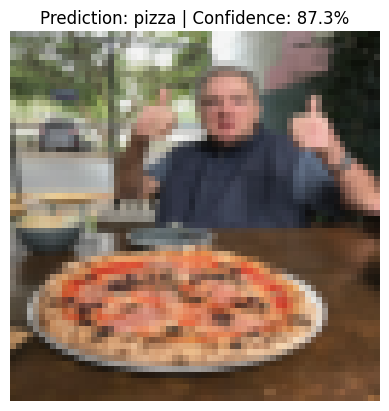

In [113]:
from exercise import model_builder, predict
from torchvision import transforms

HIDDEN_UNITS = 10
model = model_builder.TinyVGG(input_shape=3,
                            hidden_units=HIDDEN_UNITS,
                            output_shape=len(class_names)).to(device)
model.load_state_dict(torch.load(f="models/05_going_modular_script_mode_tinyvgg_model.pth", weights_only=True))

# Create transforms
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64))
])

# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesnt exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f: # Create file with write permissions as f (shorthand for file)
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg") # make sure get the raw data, not blob
    print(f"Downloading Image...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exist")

# Pred on our custom image
predict.pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)
